In [2]:
import os
import json
from collections import defaultdict
from collections import Counter
from copy import deepcopy
import string
from string import punctuation

In [3]:
RESULTS = '../results/spot_diff'

In [4]:
gpt = json.load(open(f'{RESULTS}/gpt.json'))

In [5]:
gemini = json.load(open(f'{RESULTS}/gemini.json'))

In [6]:
llava = [json.loads(q) for q in open(os.path.expanduser(f'{RESULTS}/llava.jsonl'), "r")]

In [29]:
vila = [json.loads(q) for q in open(os.path.expanduser(f'{RESULTS}/vila.jsonl'), "r")]

# GPT

In [7]:
def cal_acc(key, data):
    correct = []
    wrong = []
    invalid = []
    error = []
    c = 0
    for i in data:
        c += 1
        if isinstance(i[key], dict):
            error.append(i)
            continue
        pred = i[key].lstrip(' ').rstrip(' ').lower().strip(punctuation)
        gt = i['Answer'].lstrip(' ').rstrip(' ').lower().strip(punctuation)
        options = [j.lstrip(' ').rstrip(' ').lower().strip(punctuation) for j in i['Modified_option'].split(',')] + ['none']

        if 'error' in pred:
            error.append(i)
        elif pred not in options:
            invalid.append(i)
        else:
            if pred == gt:
                correct.append(i)
            else:
                wrong.append(i)
    return correct, wrong, invalid, error, c

In [8]:
correct, wrong, invalid, error, c = cal_acc('gpt_answer', gpt)

In [9]:
invalid

[{'image_1': 'spot-the-diff/pair_images/test/11005/11005.png',
  'image_2': 'spot-the-diff/pair_images/test/11005/11005_2.png',
  'image_diff': 'spot-the-diff/pair_images/test/11005/11005_diff.jpg',
  'difference': ['the people walking are no longer there',
   'there is a new person in the front'],
  'image_1_object_list': 'striped shirt person, white shirt person, green trees, beige building, gray sidewalk, blue trash can.',
  'image_2_object_list': 'Walking people, brown building, green trees, gray sidewalk',
  'gpt_extract_objects_gt': 'people, person',
  'Modified_option': ' green trees,Walking people, blue trash can.,striped shirt person and white shirt person, brown building, gray sidewalk, beige building',
  'Answer': 'striped shirt person and white shirt person',
  'gpt_answer': 'Walking people\n'}]

In [10]:
len(correct)

527

In [11]:
len(wrong)

732

In [54]:
# error = []
# correct_pred = []
# wrong_pred = []
# gt = []
# correct = []
# wrong = []

# for pair in gpt:
#     gt.append(pair['answer'])
#     # if pair['gpt_answer'] not in ('Left', "Right"):
#     #     # print(pair)
#     #     error.append(pair)
#     #     continue
#     if pair['answer'] == pair['gpt_answer']:
#             correct.append(pair)
#             correct_pred.append(pair['gpt_answer'])
#     elif pair['answer'] != pair['gpt_answer']:
#             wrong.append(pair)
#             wrong_pred.append(pair['gpt_answer'])
#     else:
#         print('fuck')

In [12]:
len(correct) / (len(correct) + len(wrong))

0.4185861795075457

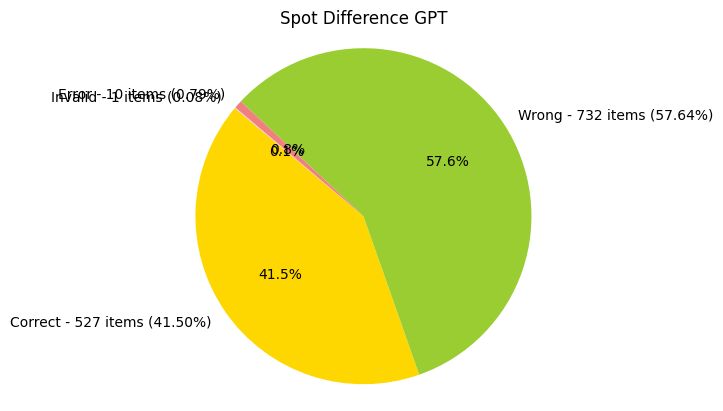

In [13]:
sizes = [len(correct), len(wrong), len(error), len(invalid)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
          f'Invalid - {sizes[3]} items ({sizes[3]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral', 'pink']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Spot Difference GPT')
plt.show()

In [15]:
len(correct)+len(wrong)+len(error)+len(invalid)

1270

# Gemini

In [59]:
# error = []
# refine = []
# rerun = []
# for pair in gemini:
#     new = deepcopy(pair)

#     # Remove space, punctuation from prediction 
#     pred = new['gemini_answer']
#     pred = pred.strip()
#     pred = pred.translate(str.maketrans('','',string.punctuation))
#     new['gemini_answer'] = pred
    
#     refine.append(new)
    
        

In [63]:

# correct_pred = []
# wrong_pred = []
# gt = []
# correct = []
# wrong = []

# for pair in refine:
#     gt.append(pair['answer'])
#     # if pair['gemini_answer'] not in ('Left', "Right"):
#     #     # print(pair)
#     #     error.append(pair)
#     #     continue
#     if pair['answer'] == pair['gemini_answer']:
#             correct.append(pair)
#             correct_pred.append(pair['gemini_answer'])
#     elif 'Error' in pair['gemini_answer']:
#             error.append(pair)
#     elif pair['answer'] != pair['gemini_answer']:
#             wrong.append(pair)
#             wrong_pred.append(pair['gemini_answer'])

#     else:
#         print('fuck')



In [16]:
# len(correct) / (len(correct) + len(wrong))

# LLaVA1.6

In [25]:
correct, wrong, invalid, error, c = cal_acc('llava_answer', llava)

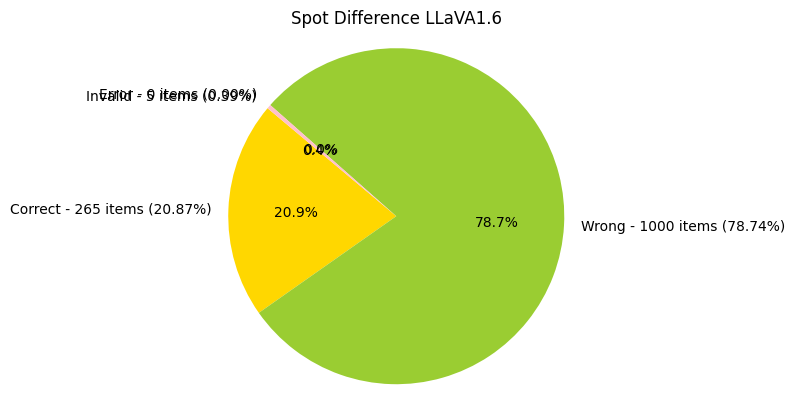

In [26]:
sizes = [len(correct), len(wrong), len(error), len(invalid)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
          f'Invalid - {sizes[3]} items ({sizes[3]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral', 'pink']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Spot Difference LLaVA1.6')
plt.show()

# Vila1.5

In [30]:
correct, wrong, invalid, error, c = cal_acc('vila_answer', vila)

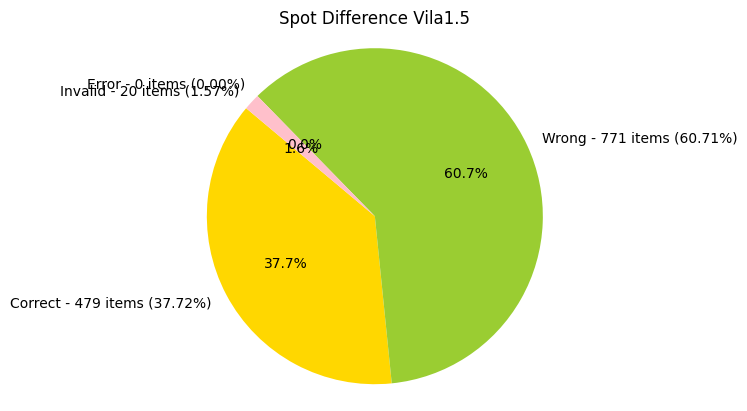

In [31]:
sizes = [len(correct), len(wrong), len(error), len(invalid)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
          f'Invalid - {sizes[3]} items ({sizes[3]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral', 'pink']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Spot Difference Vila1.5')
plt.show()

In [32]:
len(correct)+len(wrong)+len(error)+len(invalid)

1270